In [51]:
import pandas as pd

result_table = pd.read_csv('result_final.csv')
result_table.head()

,Dataset,SubjectID,Martinsson_retrained,Martinsson_crosscheck,vanDoorn_retrained,vanDoorn_crosscheck,Deng_retrained,Deng_crosscheck,Lee_retrained,Lee_crosscheck,Rabby_retrained,Li_retrained,Rabby_crosscheck,Li_crosscheck,baseline
0,OhioT1DM,540,21.352480,21.352480,21.641844,21.641844,22.35,22.35,22.78,22.78,22.721628,21.346598,22.721628,21.830528,26.662815
1,OhioT1DM,544,17.058359,17.058359,17.046157,17.046157,17.15,17.15,18.18,18.18,17.686695,17.790308,17.686695,18.157267,23.247402
2,OhioT1DM,552,16.038330,16.038330,16.355163,16.355163,16.60,16.60,16.67,16.67,17.218540,16.038720,17.218540,16.875702,23.262571
3,OhioT1DM,559,18.618088,18.618088,19.028491,19.028491,19.06,19.06,19.87,19.87,20.015371,18.493727,20.015371,18.869516,28.477447
4,OhioT1DM,563,17.997108,17.997108,18.097660,18.097660,18.38,18.38,18.32,18.32,18.488050,18.988787,18.488050,19.197340,20.256378


In [52]:
# Separate the DataFrame into three sub-DataFrames by dataset type
ohio = result_table[result_table['Dataset'] == 'OhioT1DM']
ohio_filtered = ohio[["SubjectID", "Martinsson_retrained", "vanDoorn_retrained", 'Deng_retrained', 'Lee_retrained', 'Rabby_retrained', 'Li_retrained', 'baseline']]

diatrend = result_table[result_table['Dataset'] == 'DiaTrend']
diatrend_filtered = diatrend[["SubjectID", "Martinsson_retrained", "vanDoorn_retrained", 'Deng_retrained', 'Lee_retrained', 'Rabby_retrained', 'Li_retrained', 'baseline']]

t1dexi = result_table[result_table['Dataset'] == 'T1DEXI']
t1dexi_filtered = t1dexi[["SubjectID", "Martinsson_retrained", "vanDoorn_retrained", 'Deng_retrained', 'Lee_retrained', 'Rabby_retrained', 'Li_retrained', 'baseline']]

In [53]:
ohio.columns

Index(['Dataset', 'SubjectID', 'Martinsson_retrained', 'Martinsson_crosscheck',
       'vanDoorn_retrained', 'vanDoorn_crosscheck', 'Deng_retrained',
       'Deng_crosscheck', 'Lee_retrained', 'Lee_crosscheck', 'Rabby_retrained',
       'Li_retrained', 'Rabby_crosscheck', 'Li_crosscheck', 'baseline'],
      dtype='object')

In [54]:
def statistics(result_table):
    # Filter columns with "_retrained"
    retrained_columns = [col for col in result_table.columns if '_retrained' in col]

    # Calculate statistics for each "_retrained" column
    stats = {}
    for col in retrained_columns:
        average = result_table[col].mean()
        std_dev = result_table[col].std()
        # percentile_75_25 = result_table[col].quantile(0.75) - result_table[col].quantile(0.25)
        
        stats[col] = {
            # 'max-min': max_min,
            'Mean': average,
            'Standard deviation': std_dev,
            'Max': result_table[col].max(),
            'Min': result_table[col].min(),
            # '75percentile-25percentile': percentile_75_25
        }

    # Convert the stats dictionary to a DataFrame for better visualization
    stats_df = pd.DataFrame(stats).transpose()
    stats_df = stats_df.round(2)

    print(stats_df)

In [55]:
statistics(ohio)

                       Mean  Standard deviation    Max    Min
Martinsson_retrained  18.86                2.13  21.63  16.04
vanDoorn_retrained    19.20                2.14  22.12  16.36
Deng_retrained        19.34                2.30  22.35  16.10
Lee_retrained         19.78                2.45  23.15  16.67
Rabby_retrained       19.78                2.37  22.74  16.25
Li_retrained          19.31                2.38  22.63  15.56


In [56]:
statistics(diatrend)

                       Mean  Standard deviation    Max    Min
Martinsson_retrained  23.85                3.91  34.18  17.52
vanDoorn_retrained    24.08                3.89  34.18  17.56
Deng_retrained        24.24                3.91  34.52  17.76
Lee_retrained         25.46                4.56  36.80  17.83
Rabby_retrained       25.24                4.59  35.96  18.26
Li_retrained          26.20                6.11  46.83  17.81


In [57]:
statistics(t1dexi)

                       Mean  Standard deviation    Max    Min
Martinsson_retrained  19.40                3.79  32.98  10.81
vanDoorn_retrained    19.55                3.71  33.01  11.06
Deng_retrained        19.80                3.73  32.63  11.13
Lee_retrained         20.31                3.96  34.20  11.84
Rabby_retrained       22.29                4.59  36.08  11.62
Li_retrained          20.92                4.33  33.03  10.81


In [58]:
def calculations(result_table):
    # Filter columns with "_retrained"
    retrained_columns = [col for col in result_table.columns if '_retrained' in col]

    # Calculate statistics for each "_retrained" column
    # Calculate statistics for each "_retrained" column
    stats = {
        'max-min': [],
        'average': [],
        'std_dev': [],
        '75percentile-25percentile': []
    }
    for col in retrained_columns:
        max_min = result_table[col].max() - result_table[col].min()
        average = result_table[col].mean()
        std_dev = result_table[col].std()
        percentile_75_25 = result_table[col].quantile(0.75) - result_table[col].quantile(0.25)

        stats['max-min'].append(max_min)
        stats['average'].append(average)
        stats['std_dev'].append(std_dev)
        stats['75percentile-25percentile'].append(percentile_75_25)
        
    # Calculate the average of each statistic
    average_stats = {key: sum(values) / len(values) for key, values in stats.items()}

    # Print the average statistics
    print("Average of max-min:", average_stats['max-min'])
    print("Average of average:", average_stats['average'])
    print("Average of std_dev:", average_stats['std_dev'])
    # print("Average of 75percentile-25percentile:", average_stats['75percentile-25percentile'])

In [9]:
calculations(ohio)

                       max-min    average   std_dev  75percentile-25percentile
Martinsson_retrained  5.595525  18.858618  2.133766                   3.983422
vanDoorn_retrained    5.763944  19.199907  2.138118                   4.094587
Deng_retrained        6.250000  19.336667  2.298459                   4.427500
Lee_retrained         6.480000  19.783333  2.452855                   3.982500
Rabby_retrained       6.494467  19.779454  2.365743                   4.482449
Li_retrained          8.660630  19.959327  2.647404                   3.862631


In [59]:
calculations(ohio)

Average of max-min: 6.276071769999999
Average of average: 19.377945961388885
Average of std_dev: 2.2948078862318053


In [10]:
calculations(diatrend)

                        max-min    average    std_dev  \
Martinsson_retrained  16.663800  23.849664   3.912495   
vanDoorn_retrained    16.619160  24.079680   3.892353   
Deng_retrained        16.760000  24.236415   3.911880   
Lee_retrained         18.970000  25.456604   4.557609   
Rabby_retrained       23.003954  30.225727   5.947130   
Li_retrained          41.917099  31.920225  11.860680   

                      75percentile-25percentile  
Martinsson_retrained                   5.980330  
vanDoorn_retrained                     5.899460  
Deng_retrained                         6.000000  
Lee_retrained                          6.740000  
Rabby_retrained                        8.941815  
Li_retrained                          10.151650  


In [60]:
calculations(diatrend)

Average of max-min: 19.287926
Average of average: 24.844196176100628
Average of std_dev: 4.495029599798127


In [11]:
calculations(t1dexi)

                        max-min    average   std_dev  \
Martinsson_retrained  22.171210  19.398173  3.791619   
vanDoorn_retrained    21.945040  19.552138  3.713791   
Deng_retrained        21.500000  19.798254  3.731132   
Lee_retrained         22.360000  20.312540  3.959492   
Rabby_retrained       24.745218  22.253797  4.608388   
Li_retrained          22.214825  20.915479  4.326598   

                      75percentile-25percentile  
Martinsson_retrained                   4.534570  
vanDoorn_retrained                     4.530590  
Deng_retrained                         4.565000  
Lee_retrained                          5.060000  
Rabby_retrained                        5.509793  
Li_retrained                           5.732377  


In [61]:
calculations(t1dexi)

Average of max-min: 22.443155416666666
Average of average: 20.37733391931217
Average of std_dev: 4.018525140106376


In [41]:
# T-test result
# import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def plot_heatmap(data, title):
    # Calculate the correlation matrix and p-values
    corr = data.corr()
    p_values = pd.DataFrame(index=corr.index, columns=corr.columns)
    t_values = pd.DataFrame(index=corr.index, columns=corr.columns)
    
    for row in corr.index:
        for col in corr.columns:
            if row != col:
                r, p = pearsonr(data[row], data[col])
                t = r * ((len(data) - 2) ** 0.5) / ((1 - r ** 2) ** 0.5)
                p_values.loc[row, col] = p
                t_values.loc[row, col] = t
            else:
                p_values.loc[row, col] = 0
                t_values.loc[row, col] = 0

    # Set up the matplotlib figure
    plt.figure(figsize=(7, 7))

    # Draw the heatmap with p-values as colors and t-values as annotations
    sns.heatmap(p_values.astype(float), annot=t_values.round(2), fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .75})

    # Add title
    plt.title(title)

    # Show the plot
    plt.show()


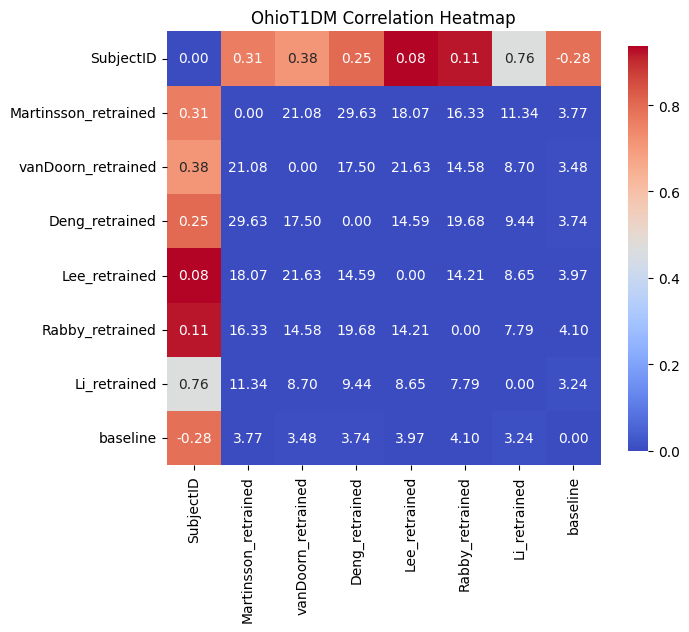

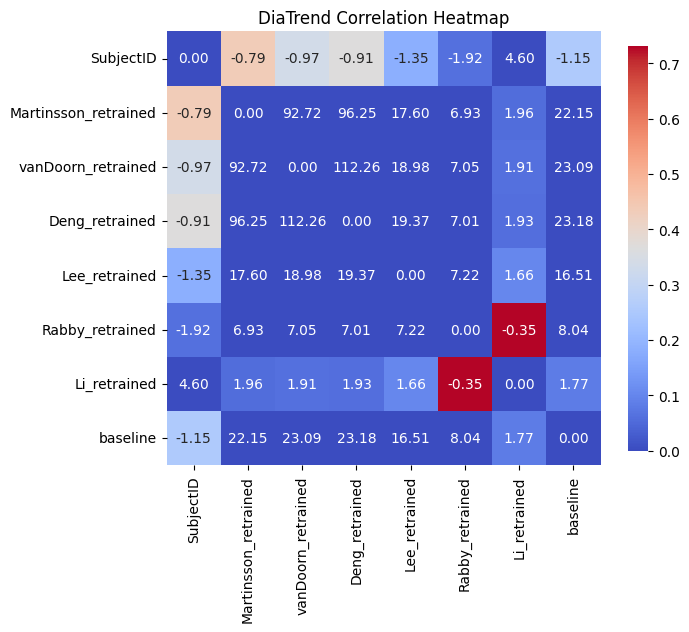

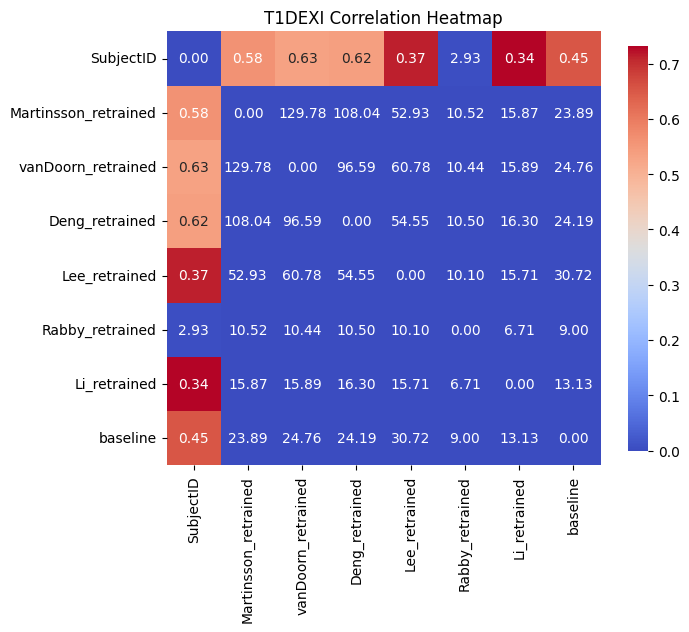

In [42]:
# Plot heatmaps for each filtered DataFrame
plot_heatmap(ohio_filtered, 'OhioT1DM Correlation Heatmap')
plot_heatmap(diatrend_filtered, 'DiaTrend Correlation Heatmap')
plot_heatmap(t1dexi_filtered, 'T1DEXI Correlation Heatmap')

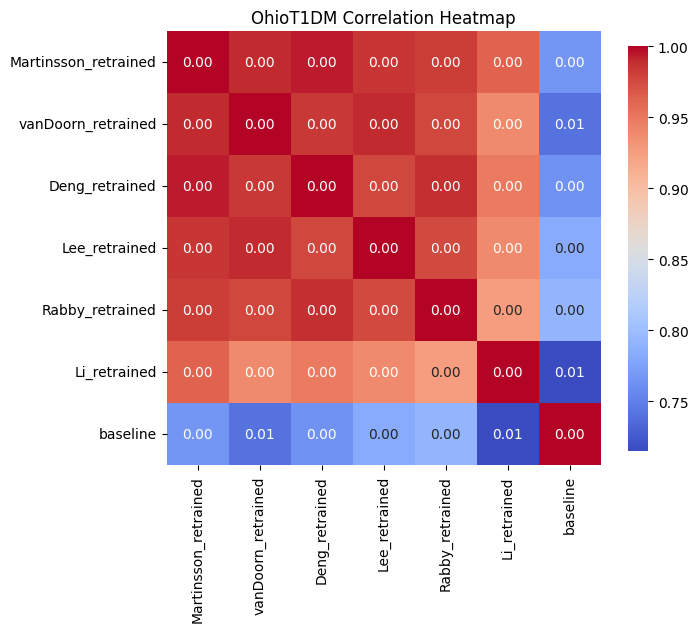

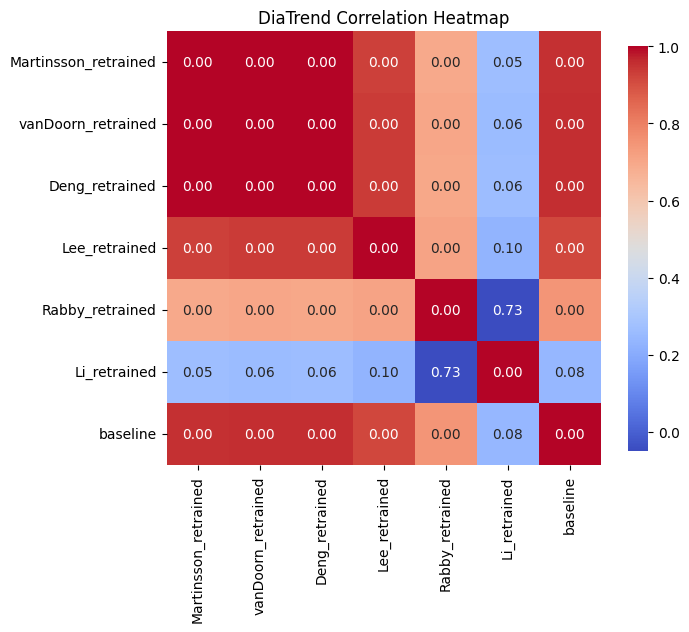

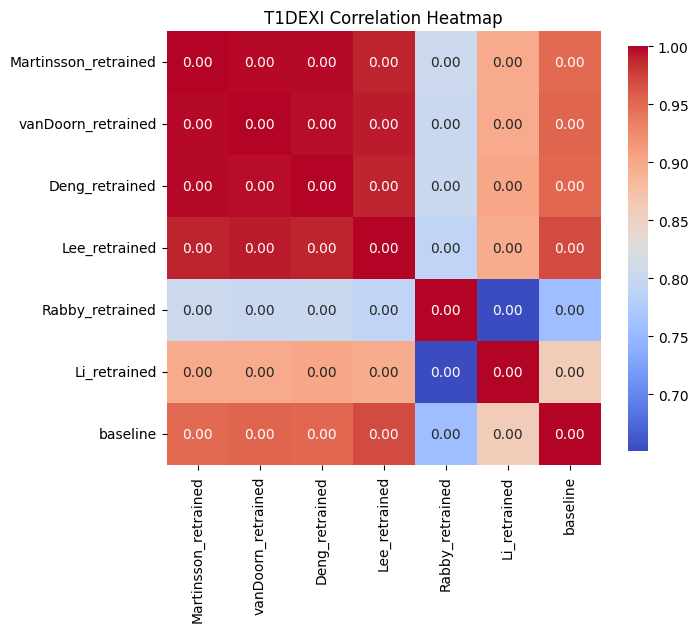

In [44]:
def plot_heatmap(data, title):
    # Calculate the correlation matrix and p-values
    corr = data.corr()
    p_values = pd.DataFrame(index=corr.index, columns=corr.columns)
    
    for row in corr.index:
        for col in corr.columns:
            if row != col:
                _, p = pearsonr(data[row], data[col])
                p_values.loc[row, col] = p
            else:
                p_values.loc[row, col] = 0

    # Set up the matplotlib figure
    plt.figure(figsize=(7, 7))

    # Draw the heatmap with p-values as annotations
    sns.heatmap(corr, annot=p_values.round(2), fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .75})

    # Add title
    plt.title(title)

    # Show the plot
    plt.show()

# Separate the DataFrame into three sub-DataFrames by dataset type
ohio = result_table[result_table['Dataset'] == 'OhioT1DM']
ohio_filtered = ohio[["Martinsson_retrained", "vanDoorn_retrained", 'Deng_retrained', 'Lee_retrained', 'Rabby_retrained', 'Li_retrained', 'baseline']]

diatrend = result_table[result_table['Dataset'] == 'DiaTrend']
diatrend_filtered = diatrend[["Martinsson_retrained", "vanDoorn_retrained", 'Deng_retrained', 'Lee_retrained', 'Rabby_retrained', 'Li_retrained', 'baseline']]

t1dexi = result_table[result_table['Dataset'] == 'T1DEXI']
t1dexi_filtered = t1dexi[["Martinsson_retrained", "vanDoorn_retrained", 'Deng_retrained', 'Lee_retrained', 'Rabby_retrained', 'Li_retrained', 'baseline']]


# Plot heatmaps for each filtered DataFrame
plot_heatmap(ohio_filtered, 'OhioT1DM Correlation Heatmap')
plot_heatmap(diatrend_filtered, 'DiaTrend Correlation Heatmap')
plot_heatmap(t1dexi_filtered, 'T1DEXI Correlation Heatmap')

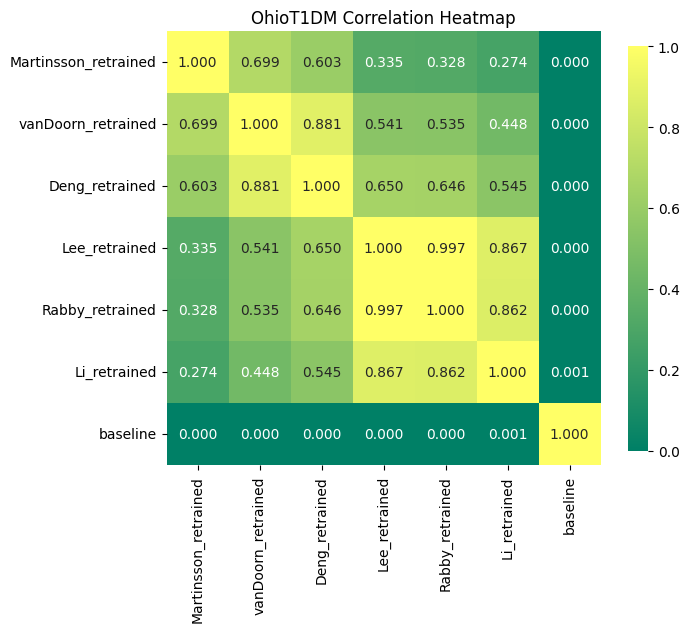

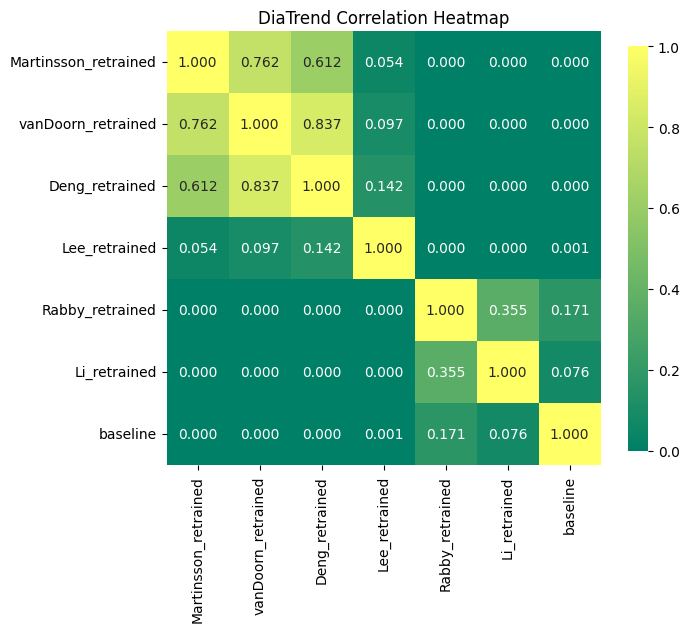

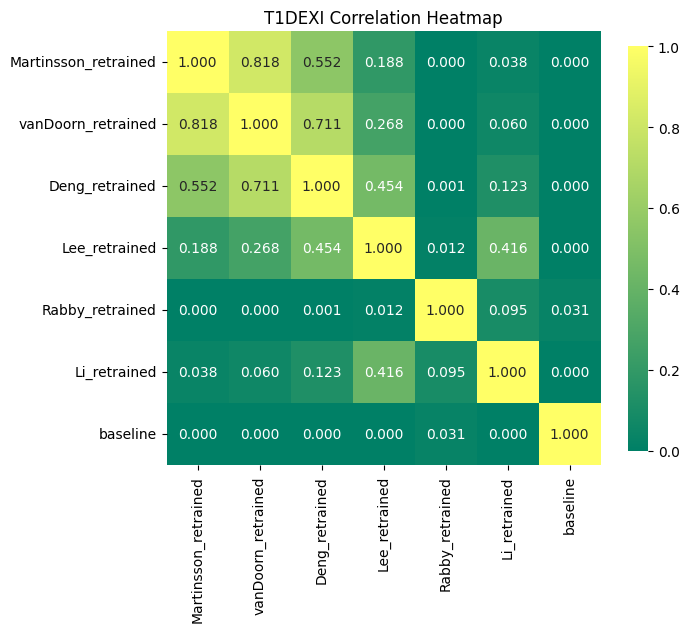

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

def plot_heatmap(data, title):
    # Calculate the correlation matrix and p-values
    corr = data.corr()
    p_values = pd.DataFrame(index=corr.index, columns=corr.columns)
    
    for row in corr.index:
        for col in corr.columns:
            if row != col:
                _, p = ttest_ind(data[row], data[col])
                p_values.loc[row, col] = p
            else:
                p_values.loc[row, col] = 1  # Set p-value to 1 for diagonal

    # Set up the matplotlib figure
    plt.figure(figsize=(7, 7))

    # Define the "summer" colormap
    cmap = sns.color_palette("summer", as_cmap=True)

    # Draw the heatmap with p-values as colors and annotations
    sns.heatmap(p_values.astype(float), annot=p_values.round(3), fmt=".3f", cmap=cmap, square=True, cbar_kws={"shrink": .75}, vmin=0, vmax=1)

    # Add title
    plt.title(title)

    # Show the plot
    plt.show()


# Separate the DataFrame into three sub-DataFrames by dataset type
ohio = result_table[result_table['Dataset'] == 'OhioT1DM']
ohio_filtered = ohio[["Martinsson_retrained", "vanDoorn_retrained", 'Deng_retrained', 'Lee_retrained', 'Rabby_retrained', 'Li_retrained', 'baseline']]

diatrend = result_table[result_table['Dataset'] == 'DiaTrend']
diatrend_filtered = diatrend[["Martinsson_retrained", "vanDoorn_retrained", 'Deng_retrained', 'Lee_retrained', 'Rabby_retrained', 'Li_retrained', 'baseline']]

t1dexi = result_table[result_table['Dataset'] == 'T1DEXI']
t1dexi_filtered = t1dexi[["Martinsson_retrained", "vanDoorn_retrained", 'Deng_retrained', 'Lee_retrained', 'Rabby_retrained', 'Li_retrained', 'baseline']]

# Plot heatmaps for each filtered DataFrame
plot_heatmap(ohio_filtered, 'OhioT1DM Correlation Heatmap')
plot_heatmap(diatrend_filtered, 'DiaTrend Correlation Heatmap')
plot_heatmap(t1dexi_filtered, 'T1DEXI Correlation Heatmap')

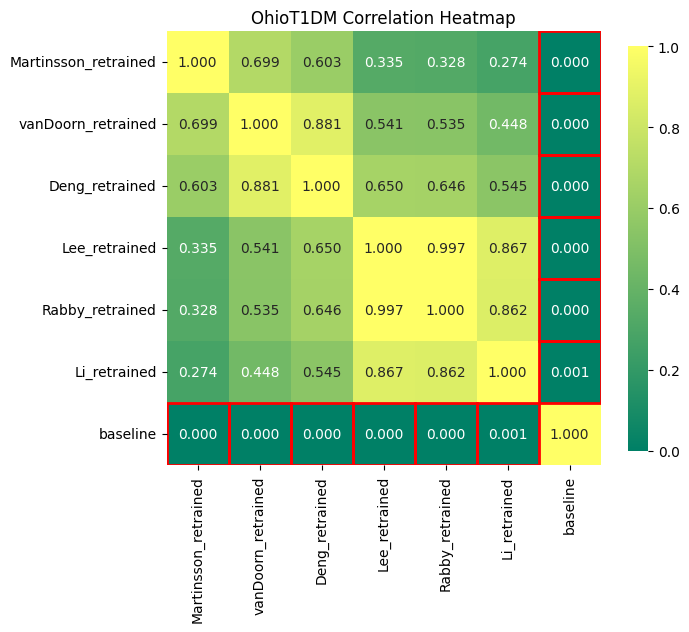

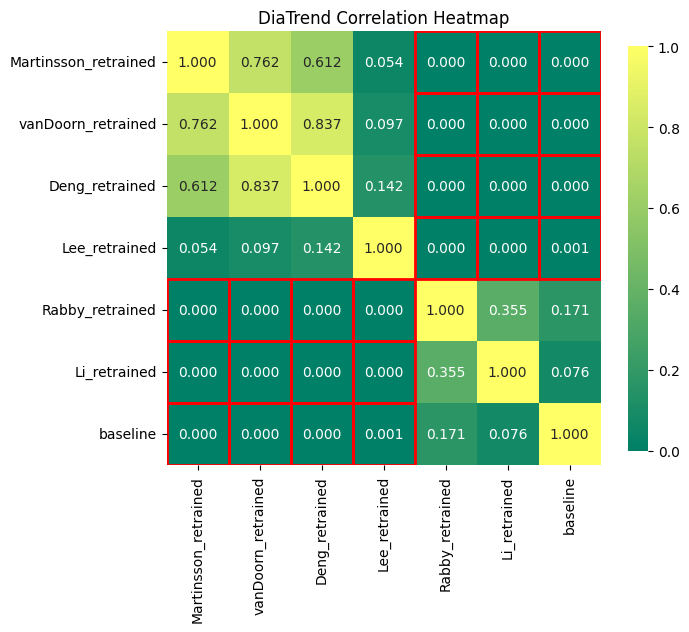

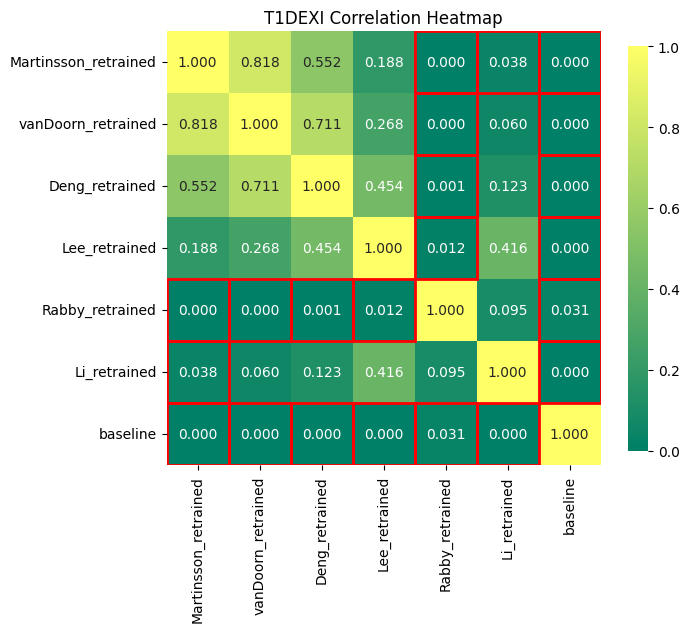

In [50]:
def plot_heatmap(data, title):
    # Calculate the correlation matrix and p-values
    corr = data.corr()
    p_values = pd.DataFrame(index=corr.index, columns=corr.columns)
    
    for row in corr.index:
        for col in corr.columns:
            if row != col:
                _, p = ttest_ind(data[row], data[col])
                p_values.loc[row, col] = p
            else:
                p_values.loc[row, col] = 1  # Set p-value to 1 for diagonal

    # Set up the matplotlib figure
    plt.figure(figsize=(7, 7))

    # Define the "summer" colormap
    cmap = sns.color_palette("summer", as_cmap=True)

    # Draw the heatmap with p-values as colors and annotations
    ax = sns.heatmap(p_values.astype(float), annot=p_values.round(3), fmt=".3f", cmap=cmap, square=True, cbar_kws={"shrink": .75}, vmin=0, vmax=1)

    # Add red rectangles for significant p-values
    for i in range(len(p_values.index)):
        for j in range(len(p_values.columns)):
            if p_values.iloc[i, j] < 0.05:
                ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=2))

    # Add title
    plt.title(title)

    # Show the plot
    plt.show()

# Separate the DataFrame into three sub-DataFrames by dataset type
ohio = result_table[result_table['Dataset'] == 'OhioT1DM']
ohio_filtered = ohio[["Martinsson_retrained", "vanDoorn_retrained", 'Deng_retrained', 'Lee_retrained', 'Rabby_retrained', 'Li_retrained', 'baseline']]

diatrend = result_table[result_table['Dataset'] == 'DiaTrend']
diatrend_filtered = diatrend[["Martinsson_retrained", "vanDoorn_retrained", 'Deng_retrained', 'Lee_retrained', 'Rabby_retrained', 'Li_retrained', 'baseline']]

t1dexi = result_table[result_table['Dataset'] == 'T1DEXI']
t1dexi_filtered = t1dexi[["Martinsson_retrained", "vanDoorn_retrained", 'Deng_retrained', 'Lee_retrained', 'Rabby_retrained', 'Li_retrained', 'baseline']]

# Plot heatmaps for each filtered DataFrame
plot_heatmap(ohio_filtered, 'OhioT1DM Correlation Heatmap')
plot_heatmap(diatrend_filtered, 'DiaTrend Correlation Heatmap')
plot_heatmap(t1dexi_filtered, 'T1DEXI Correlation Heatmap')


# Demographics figures & Gendar towards management figures

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

demographics = pd.read_csv('./demographics.csv')
demographics.head()

,Dataset,Patient_id,Gender,Age,Race,AVE CGM (daily avg),Gly var (daily std),TIR ratio,T1DEXI Exercise Group,Insulin Delivery Mode,"BMI (just for T1DEXI, normal or overweight)",HbA1C
0,OhioT1DM,540,M,20–40,NaN,141.0050,33.91281,0.690298,NaN,PUMP,NaN,NaN
1,OhioT1DM,544,M,40–60,NaN,164.8916,30.75381,0.640227,NaN,PUMP,NaN,NaN
2,OhioT1DM,552,M,20–40,NaN,145.2375,31.03995,0.729447,NaN,PUMP,NaN,NaN
3,OhioT1DM,559,F,20–40,NaN,167.8130,36.87849,0.553600,NaN,PUMP,NaN,NaN
4,OhioT1DM,563,M,40–60,NaN,149.8922,28.71523,0.711924,NaN,PUMP,NaN,NaN


In [108]:
# Separate the DataFrame into three sub-DataFrames by dataset type
ohio = demographics[demographics['Dataset'] == 'OhioT1DM']
diatrend = demographics[demographics['Dataset'] == 'DiaTrend']
t1dexi = demographics[demographics['Dataset'] == 'T1DEXI']

/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_76564/1989634572.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dataset', y='TIR ratio', data=combined_df, palette='Set2', inner='box', linewidth=1.7)


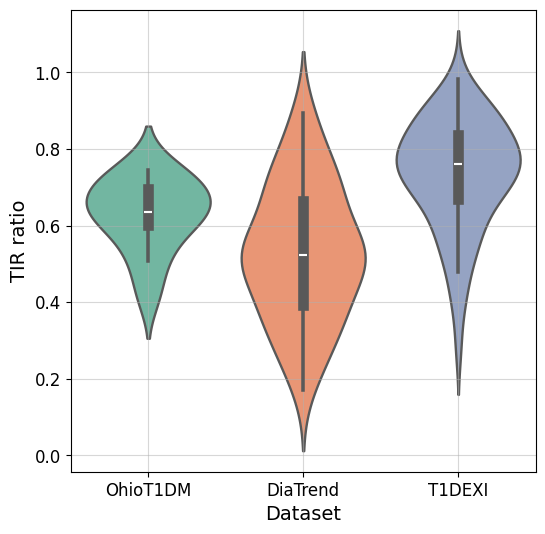

In [109]:
# Combine the three DataFrames into one for plotting
combined_df = pd.concat([
    ohio[['TIR ratio']].assign(Dataset='OhioT1DM'),
    diatrend[['TIR ratio']].assign(Dataset='DiaTrend'),
    t1dexi[['TIR ratio']].assign(Dataset='T1DEXI')
])

# Create a violin plot
plt.figure(figsize=(6, 6))
sns.violinplot(x='Dataset', y='TIR ratio', data=combined_df, palette='Set2', inner='box', linewidth=1.7)

# Add title and labels
# plt.title('Distribution of TIR ratio by Dataset')
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('TIR ratio', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.show()

In [65]:
import pandas as pd
import scipy.stats as stats

# Extract TIR ratio values from each dataset
tir_ohio = ohio['TIR ratio'].dropna()
tir_diatrend = diatrend['TIR ratio'].dropna()
tir_t1dexi = t1dexi['TIR ratio'].dropna()

# Kruskal-Wallis test (non-parametric)
stat, p_value = stats.kruskal(tir_ohio, tir_diatrend, tir_t1dexi)

print(f'Kruskal-Wallis test statistic: {stat:.4f}')
print(f'p-value: {p_value:.4e}')

# Interpret the result
if p_value < 0.05:
    print("The TIR ratios between the datasets are significantly different.")
else:
    print("The TIR ratios between the datasets are NOT significantly different.")



Kruskal-Wallis test statistic: 37.1671
p-value: 8.4972e-09
The TIR ratios between the datasets are significantly different.


/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_76564/2767301668.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dataset', y=column_name, data=combined_df, palette='Set2', inner='box', linewidth=1.7)


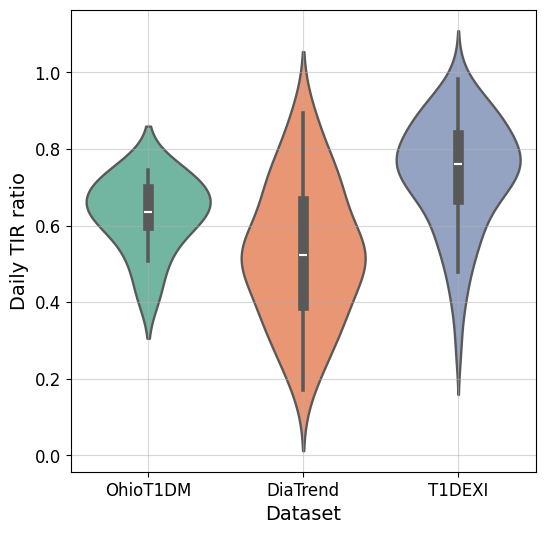

/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_76564/2767301668.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dataset', y=column_name, data=combined_df, palette='Set2', inner='box', linewidth=1.7)


Kruskal-Wallis test statistic: 37.1671
p-value: 8.4972e-09
The Daily TIR ratio between the datasets are significantly different.


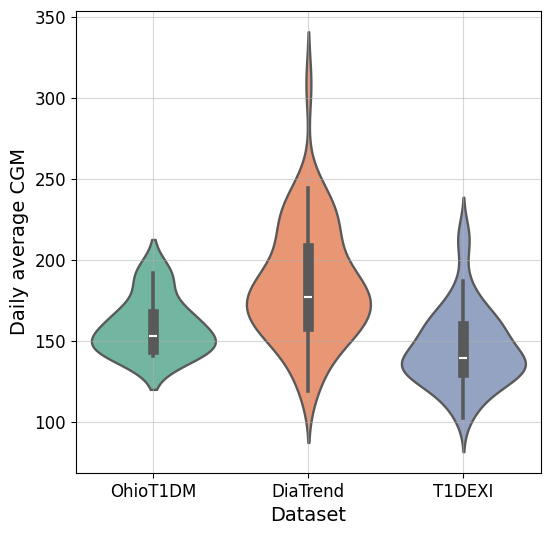

Kruskal-Wallis test statistic: 42.4038
p-value: 6.1962e-10
The Daily average CGM between the datasets are significantly different.


/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_76564/2767301668.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dataset', y=column_name, data=combined_df, palette='Set2', inner='box', linewidth=1.7)


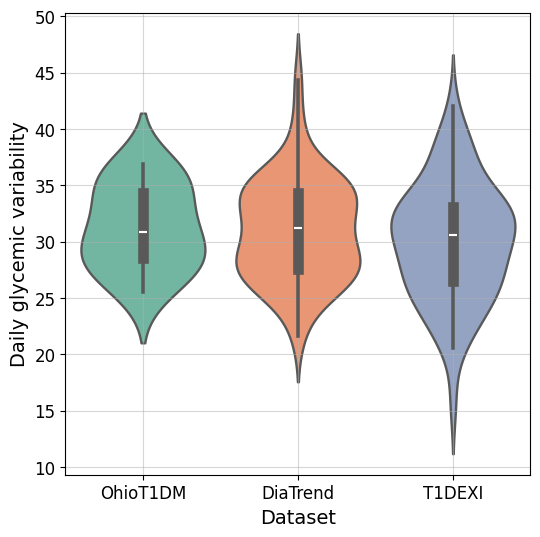

Kruskal-Wallis test statistic: 1.1878
p-value: 5.5216e-01
The Daily glycemic variability between the datasets are NOT significantly different.


In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
demographics = pd.read_csv('demographics.csv')
# Rename the specified columns
demographics.rename(columns={
    'AVE CGM (daily avg)': 'Daily average CGM',
    'TIR ratio': 'Daily TIR ratio',
    'Gly var (daily std)': 'Daily glycemic variability'
}, inplace=True)

# Separate the DataFrame into three sub-DataFrames by dataset type
ohio = demographics[demographics['Dataset'] == 'OhioT1DM']
diatrend = demographics[demographics['Dataset'] == 'DiaTrend']
t1dexi = demographics[demographics['Dataset'] == 'T1DEXI']

# Function to create violin plots
def create_violin_plot(column_name, title):
    # Combine the three DataFrames into one for plotting
    combined_df = pd.concat([
        ohio[[column_name]].assign(Dataset='OhioT1DM'),
        diatrend[[column_name]].assign(Dataset='DiaTrend'),
        t1dexi[[column_name]].assign(Dataset='T1DEXI')
    ])

    # Create a violin plot
    plt.figure(figsize=(6, 6))
    sns.violinplot(x='Dataset', y=column_name, data=combined_df, palette='Set2', inner='box', linewidth=1.7)

    # Add title and labels
    plt.xlabel('Dataset', fontsize=14)
    plt.ylabel(column_name, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(alpha=0.5)

    # Show the plot
    plt.show()

    # Extract TIR ratio values from each dataset
    tir_ohio = ohio[column_name].dropna()
    tir_diatrend = diatrend[column_name].dropna()
    tir_t1dexi = t1dexi[column_name].dropna()

    # Kruskal-Wallis test (non-parametric)
    stat, p_value = stats.kruskal(tir_ohio, tir_diatrend, tir_t1dexi)

    print(f'Kruskal-Wallis test statistic: {stat:.4f}')
    print(f'p-value: {p_value:.4e}')

    # Interpret the result
    if p_value < 0.05:
        print(f"The {column_name} between the datasets are significantly different.")
    else:
        print(f"The {column_name} between the datasets are NOT significantly different.")

# Create violin plots for the specified columns
create_violin_plot('Daily TIR ratio', 'Distribution of TIR ratio by Dataset')
create_violin_plot('Daily average CGM', 'Distribution of AVE CGM (daily avg) by Dataset')
create_violin_plot('Daily glycemic variability', 'Distribution of Gly var (daily std) by Dataset')

/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_76564/967677229.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dataset', y=column_name, data=combined_df, palette='Set2', inner='box', linewidth=1.7)


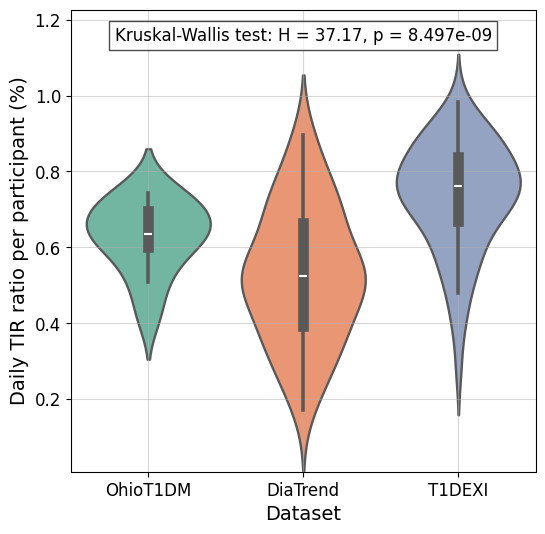

/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_76564/967677229.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dataset', y=column_name, data=combined_df, palette='Set2', inner='box', linewidth=1.7)


Kruskal-Wallis test statistic: 37.1671
p-value: 8.4972e-09
The Daily TIR ratio per participant (%) between the datasets are significantly different.


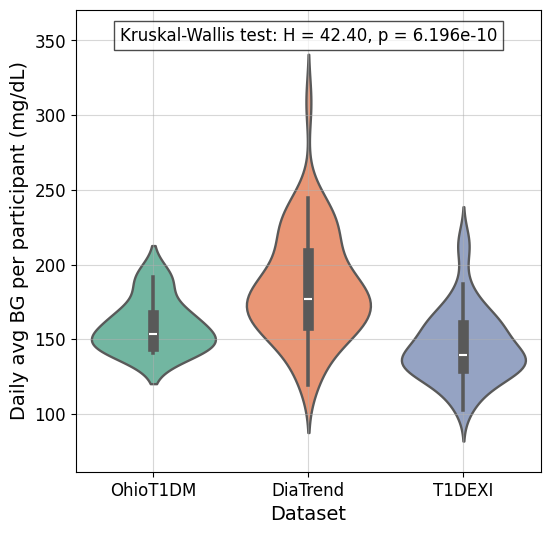

Kruskal-Wallis test statistic: 42.4038
p-value: 6.1962e-10
The Daily avg BG per participant (mg/dL) between the datasets are significantly different.


/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_76564/967677229.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dataset', y=column_name, data=combined_df, palette='Set2', inner='box', linewidth=1.7)


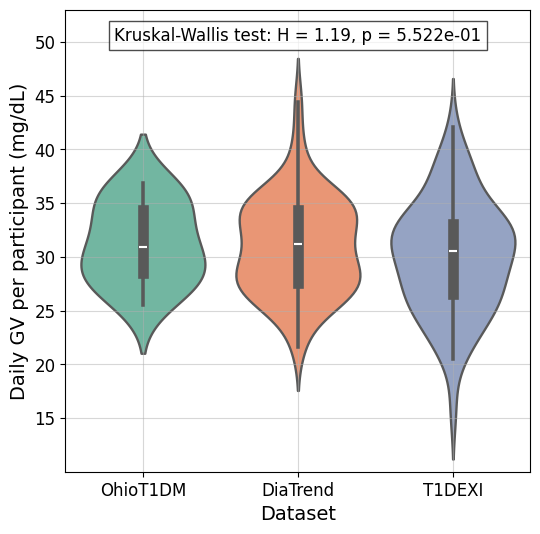

Kruskal-Wallis test statistic: 1.1878
p-value: 5.5216e-01
The Daily GV per participant (mg/dL) between the datasets are NOT significantly different.


In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
demographics = pd.read_csv('demographics.csv')
# Rename the specified columns
demographics.rename(columns={
    'AVE CGM (daily avg)': 'Daily avg BG per participant (mg/dL)',
    'TIR ratio': 'Daily TIR ratio per participant (%)',
    'Gly var (daily std)': 'Daily GV per participant (mg/dL)'
}, inplace=True)

# Separate the DataFrame into three sub-DataFrames by dataset type
ohio = demographics[demographics['Dataset'] == 'OhioT1DM']
diatrend = demographics[demographics['Dataset'] == 'DiaTrend']
t1dexi = demographics[demographics['Dataset'] == 'T1DEXI']

# Function to create violin plots
def create_violin_plot(column_name):
    # Combine the three DataFrames into one for plotting
    combined_df = pd.concat([
        ohio[[column_name]].assign(Dataset='OhioT1DM'),
        diatrend[[column_name]].assign(Dataset='DiaTrend'),
        t1dexi[[column_name]].assign(Dataset='T1DEXI')
    ])

    # Create a violin plot
    plt.figure(figsize=(6, 6))
    sns.violinplot(x='Dataset', y=column_name, data=combined_df, palette='Set2', inner='box', linewidth=1.7)

    # Add title and labels
    plt.xlabel('Dataset', fontsize=14)
    plt.ylabel(column_name, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(alpha=0.5)

    # Extract TIR ratio values from each dataset
    tir_ohio = ohio[column_name].dropna()
    tir_diatrend = diatrend[column_name].dropna()
    tir_t1dexi = t1dexi[column_name].dropna()

    # Kruskal-Wallis test (non-parametric)
    stat, p_value = stats.kruskal(tir_ohio, tir_diatrend, tir_t1dexi)

    # Annotate Kruskal-Wallis test result at the top of the figure
    y_max = combined_df[column_name].max()
    y_min = combined_df[column_name].min()
    y_pos = y_max + (y_max - y_min) * 0.2  # Add small offset to keep it within figure
    

    annotation_text = f'Kruskal-Wallis test: H = {stat:.2f}, p = {p_value:.3e}'
    plt.text(1, y_pos, annotation_text, ha='center', fontsize=12, color='black', 
             bbox=dict(facecolor='white', alpha=0.7))

    # Adjust y-limits to ensure the annotation fits within the plot
    plt.ylim(y_min - (y_max - y_min) * 0.2, y_max + (y_max - y_min) * 0.3)

    # Show the plot
    # plt.title(title, fontsize=16)
    plt.show()

    # Print the result
    print(f'Kruskal-Wallis test statistic: {stat:.4f}')
    print(f'p-value: {p_value:.4e}')

    if p_value < 0.05:
        print(f"The {column_name} between the datasets are significantly different.")
    else:
        print(f"The {column_name} between the datasets are NOT significantly different.")


# Create violin plots for the specified columns
create_violin_plot('Daily TIR ratio per participant (%)')
create_violin_plot('Daily avg BG per participant (mg/dL)')
create_violin_plot('Daily GV per participant (mg/dL)')

In [ ]:
import pandas as pd
import scipy.stats as stats

# Extract TIR ratio values from each dataset
tir_ohio = ohio['TIR ratio'].dropna()
tir_diatrend = diatrend['TIR ratio'].dropna()
tir_t1dexi = t1dexi['TIR ratio'].dropna()

# Kruskal-Wallis test (non-parametric)
stat, p_value = stats.kruskal(tir_ohio, tir_diatrend, tir_t1dexi)

print(f'Kruskal-Wallis test statistic: {stat:.4f}')
print(f'p-value: {p_value:.4e}')

# Interpret the result
if p_value < 0.05:
    print("The TIR ratios between the datasets are significantly different.")
else:
    print("The TIR ratios between the datasets are NOT significantly different.")

/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_76564/2717512509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y=column_name, data=demographics, palette={'F': 'coral', 'M': 'steelblue'})


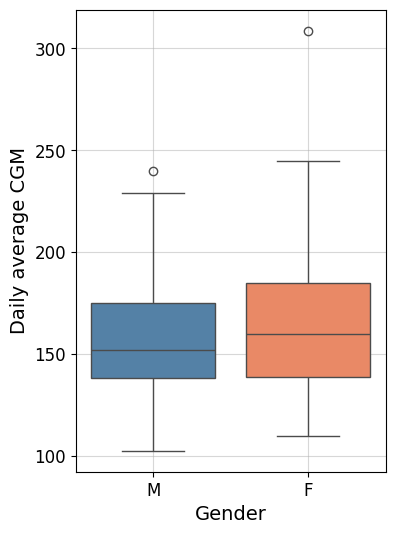

/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_76564/2717512509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y=column_name, data=demographics, palette={'F': 'coral', 'M': 'steelblue'})


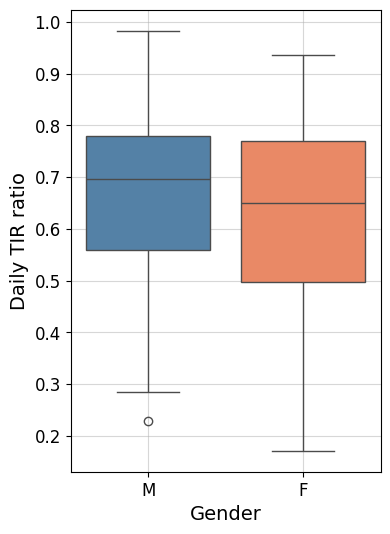

/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_76564/2717512509.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y=column_name, data=demographics, palette={'F': 'coral', 'M': 'steelblue'})


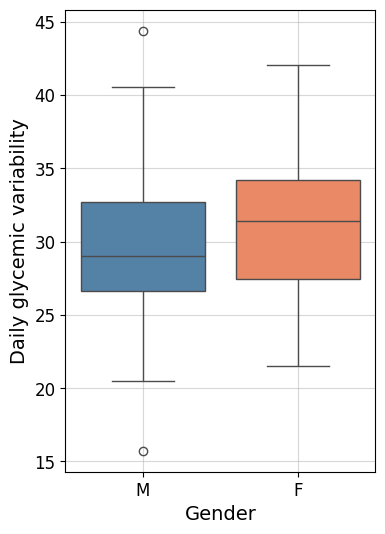

In [31]:
# Create a box plot for each specified column by gender
# Create a box plot for each specified column by gender
def create_box_plot(column_name):
    plt.figure(figsize=(4, 6))
    sns.boxplot(x='Gender', y=column_name, data=demographics, palette={'F': 'coral', 'M': 'steelblue'})
    
    # Add labels
    plt.xlabel('Gender', fontsize=14)
    plt.ylabel(column_name, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(alpha=0.5)
    
    # Show the plot
    plt.show()

# Create box plots for the specified columns
create_box_plot('Daily average CGM')
create_box_plot('Daily TIR ratio')
create_box_plot('Daily glycemic variability')

Daily average CGM: U-statistic = 2015.000, p-value = 0.290


/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_76564/2417752565.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y=column_name, data=demographics, palette={'F': 'coral', 'M': 'steelblue'})


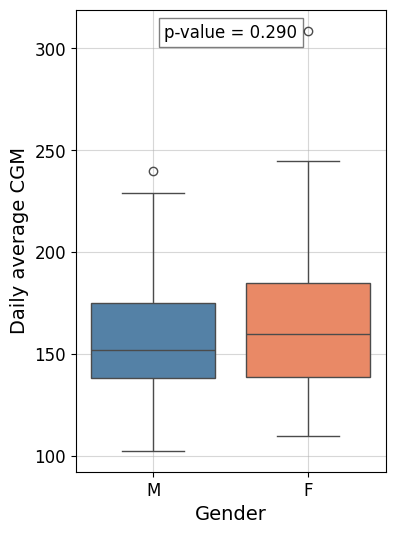

Daily TIR ratio: U-statistic = 1619.000, p-value = 0.344


/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_76564/2417752565.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y=column_name, data=demographics, palette={'F': 'coral', 'M': 'steelblue'})


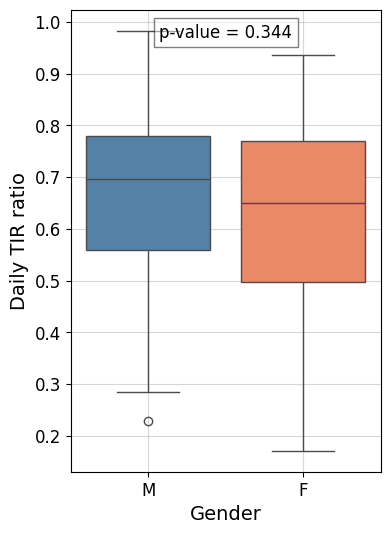

Daily glycemic variability: U-statistic = 2085.000, p-value = 0.158


/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_76564/2417752565.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y=column_name, data=demographics, palette={'F': 'coral', 'M': 'steelblue'})


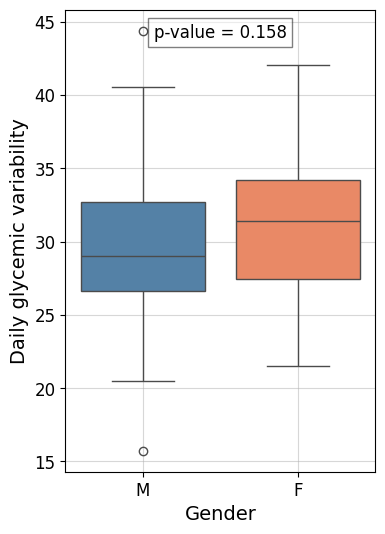

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Load the data
demographics = pd.read_csv('demographics.csv')

# Rename the specified columns
demographics.rename(columns={
    'AVE CGM (daily avg)': 'Daily average CGM',
    'TIR ratio': 'Daily TIR ratio',
    'Gly var (daily std)': 'Daily glycemic variability'
}, inplace=True)

# Create a box plot for each specified column by gender
def create_box_plot(column_name, p_value):
    plt.figure(figsize=(4, 6))
    sns.boxplot(x='Gender', y=column_name, data=demographics, palette={'F': 'coral', 'M': 'steelblue'})
    
    # Add labels
    plt.xlabel('Gender', fontsize=14)
    plt.ylabel(column_name, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(alpha=0.5)
    
    # Annotate the p-value on the plot
    plt.text(0.5, 0.95, f'p-value = {p_value:.3f}', 
             ha='center', va='center', transform=plt.gca().transAxes, 
             fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    
    # Show the plot
    plt.show()

# Perform Mann-Whitney U test between the two gender groups for each specified column
def perform_mann_whitney_u_test(column_name):
    female_data = demographics[demographics['Gender'] == 'F'][column_name]
    male_data = demographics[demographics['Gender'] == 'M'][column_name]
    
    if len(female_data) > 0 and len(male_data) > 0:
        u_stat, p_value = mannwhitneyu(female_data, male_data, alternative='two-sided')
        return u_stat, p_value
    else:
        return None, None

# Create box plots and perform Mann-Whitney U tests for the specified columns
columns = ['Daily average CGM', 'Daily TIR ratio', 'Daily glycemic variability']
for column in columns:
    u_stat, p_value = perform_mann_whitney_u_test(column)
    if p_value is not None:
        print(f'{column}: U-statistic = {u_stat:.3f}, p-value = {p_value:.3f}')
        create_box_plot(column, p_value)


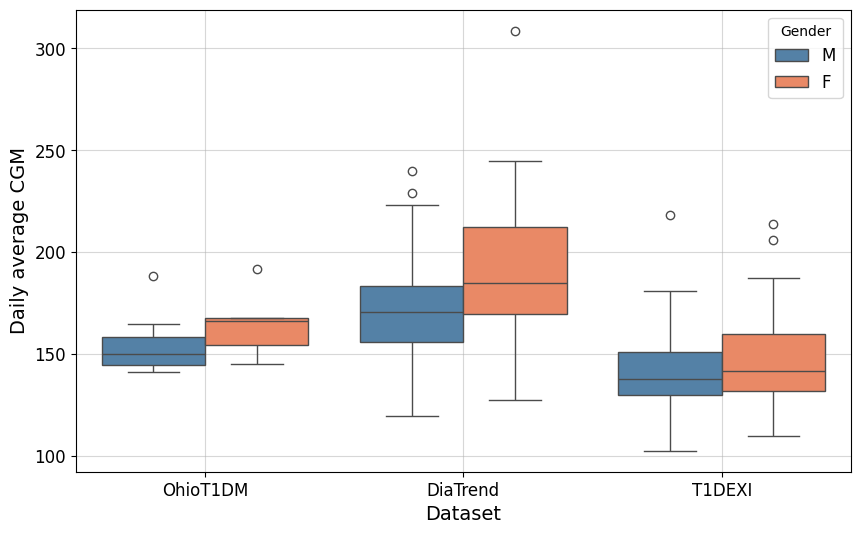

OhioT1DM - Daily average CGM: t-statistic = 1.005, p-value = 0.339
DiaTrend - Daily average CGM: t-statistic = 1.338, p-value = 0.187
T1DEXI - Daily average CGM: t-statistic = 0.536, p-value = 0.594


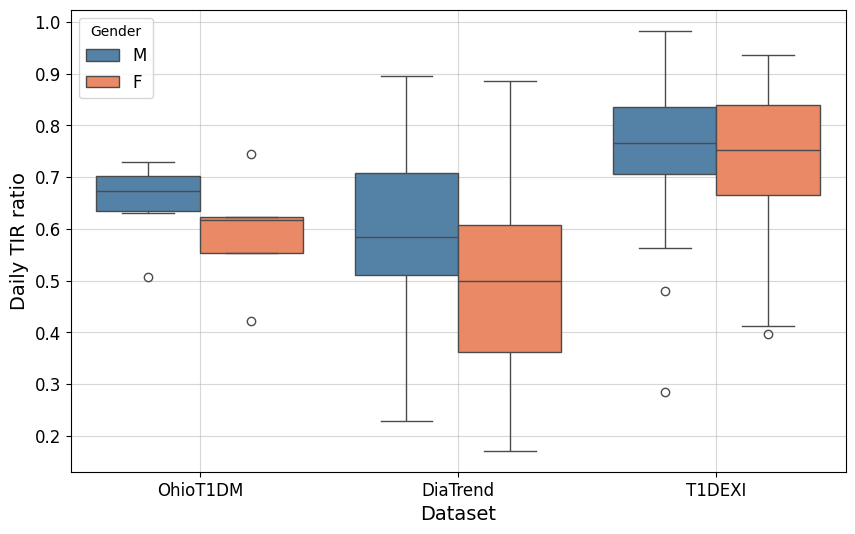

OhioT1DM - Daily TIR ratio: t-statistic = -1.142, p-value = 0.280
DiaTrend - Daily TIR ratio: t-statistic = -1.580, p-value = 0.120
T1DEXI - Daily TIR ratio: t-statistic = -0.180, p-value = 0.858


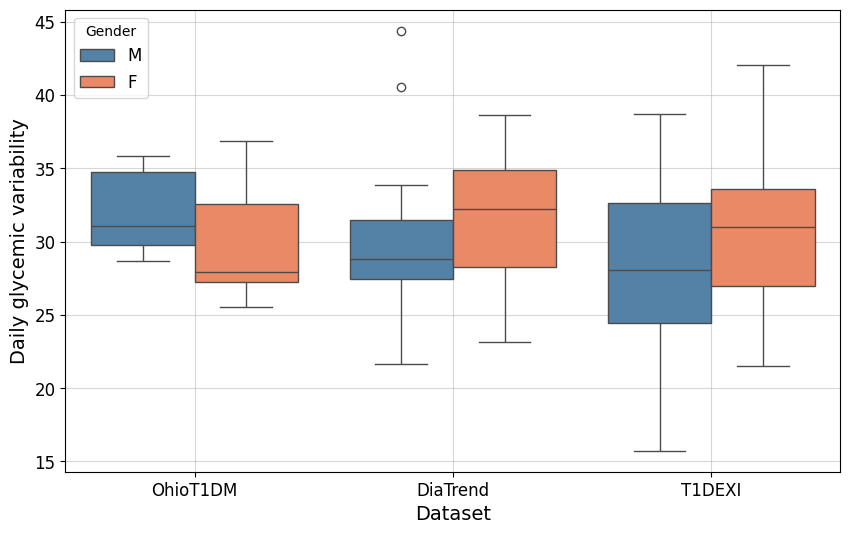

OhioT1DM - Daily glycemic variability: t-statistic = -0.939, p-value = 0.370
DiaTrend - Daily glycemic variability: t-statistic = 0.990, p-value = 0.327
T1DEXI - Daily glycemic variability: t-statistic = 1.577, p-value = 0.120


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the data
demographics = pd.read_csv('demographics.csv')

# Rename the specified columns
demographics.rename(columns={
    'AVE CGM (daily avg)': 'Daily average CGM',
    'TIR ratio': 'Daily TIR ratio',
    'Gly var (daily std)': 'Daily glycemic variability'
}, inplace=True)

# Separate the DataFrame into three sub-DataFrames by dataset type
ohio = demographics[demographics['Dataset'] == 'OhioT1DM']
diatrend = demographics[demographics['Dataset'] == 'DiaTrend']
t1dexi = demographics[demographics['Dataset'] == 'T1DEXI']

# Combine the three DataFrames into one for plotting
combined_df = pd.concat([
    ohio.assign(Dataset='OhioT1DM'),
    diatrend.assign(Dataset='DiaTrend'),
    t1dexi.assign(Dataset='T1DEXI')
])

# Create a box plot for each specified column by gender and dataset
def create_grouped_box_plot(column_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Dataset', y=column_name, hue='Gender', data=combined_df, palette={'F': 'coral', 'M': 'steelblue'})
    
    # Add labels
    plt.xlabel('Dataset', fontsize=14)
    plt.ylabel(column_name, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Gender', fontsize=12)
    plt.grid(alpha=0.5)
    
    # Show the plot
    plt.show()

# Perform t-test between the two gender groups for each specified column and dataset
def perform_t_test(data, column_name):
    female_data = data[data['Gender'] == 'F'][column_name]
    male_data = data[data['Gender'] == 'M'][column_name]
    t_stat, p_value = ttest_ind(female_data, male_data, nan_policy='omit')
    return t_stat, p_value

# Create grouped box plots and perform t-tests for the specified columns
columns = ['Daily average CGM', 'Daily TIR ratio', 'Daily glycemic variability']
for column in columns:
    create_grouped_box_plot(column)
    for dataset_name, data in datasets.items():
        t_stat, p_value = perform_t_test(data, column)
        print(f'{dataset_name} - {column}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}')

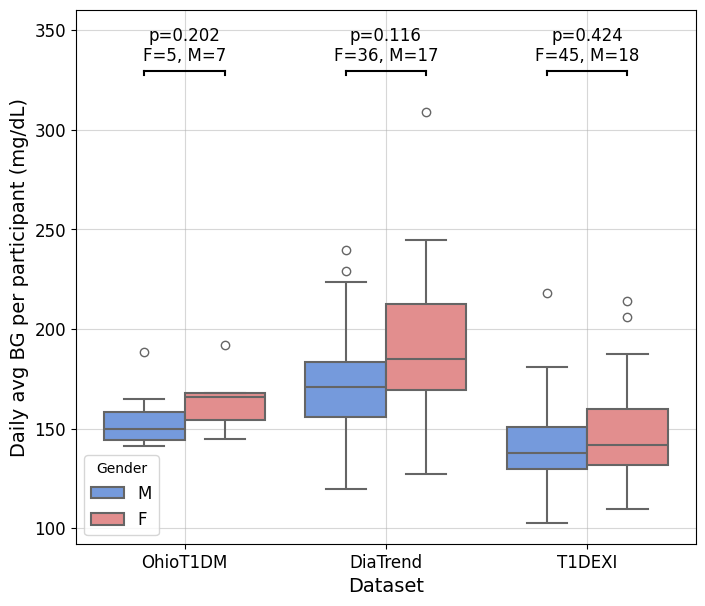

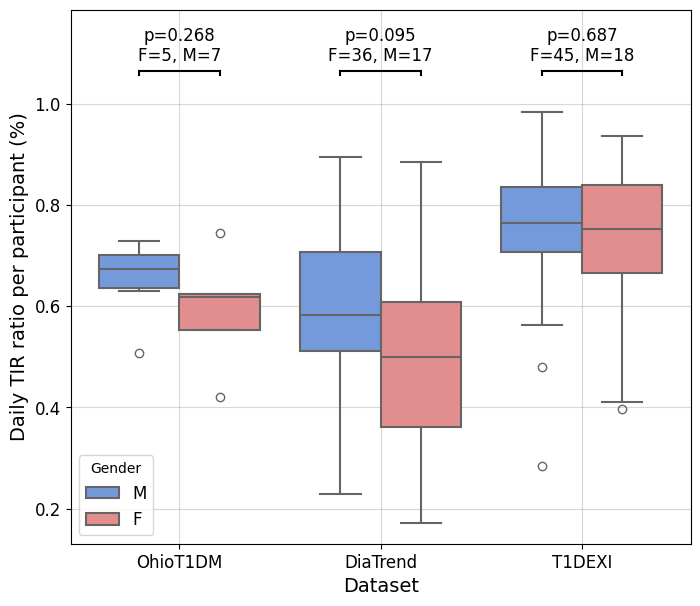

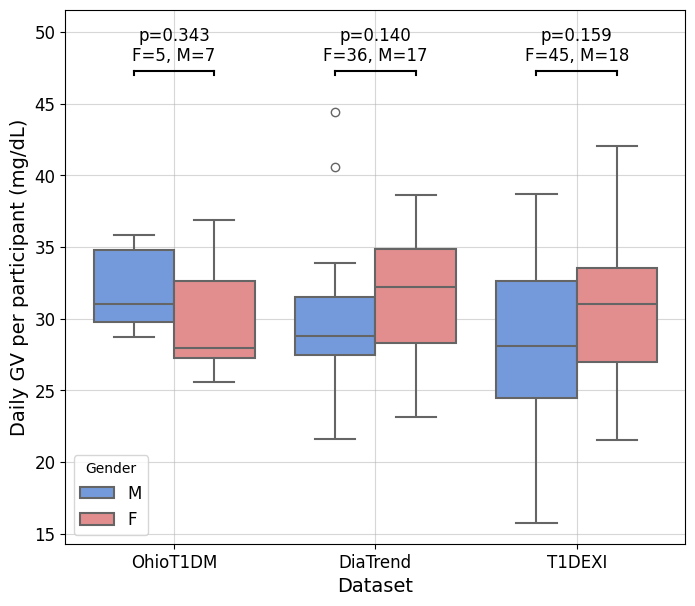

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Load the data
demographics = pd.read_csv('demographics.csv')

demographics.rename(columns={
    'AVE CGM (daily avg)': 'Daily avg BG per participant (mg/dL)',
    'TIR ratio': 'Daily TIR ratio per participant (%)',
    'Gly var (daily std)': 'Daily GV per participant (mg/dL)'
}, inplace=True)

# Separate the DataFrame into three sub-DataFrames by dataset type
ohio = demographics[demographics['Dataset'] == 'OhioT1DM']
diatrend = demographics[demographics['Dataset'] == 'DiaTrend']
t1dexi = demographics[demographics['Dataset'] == 'T1DEXI']

# Combine the three DataFrames into one for plotting
combined_df = pd.concat([
    ohio.assign(Dataset='OhioT1DM'),
    diatrend.assign(Dataset='DiaTrend'),
    t1dexi.assign(Dataset='T1DEXI')
])

# Perform Mann-Whitney U test between the two gender groups for each specified column and dataset
def perform_mann_whitney_u_test(data, column_name):
    female_data = data[data['Gender'] == 'F'][column_name]
    male_data = data[data['Gender'] == 'M'][column_name]
    
    if len(female_data) > 0 and len(male_data) > 0:
        u_stat, p_value = mannwhitneyu(female_data, male_data, alternative='two-sided')
        return u_stat, p_value
    else:
        return None, None

# Create a box plot for each specified column by gender and dataset
def create_grouped_box_plot(column_name):
    plt.figure(figsize=(8, 6))
    
    # Create the box plot
    sns.boxplot(x='Dataset', y=column_name, hue='Gender', data=combined_df, palette={'F': 'lightcoral', 'M': 'cornflowerblue'}, linewidth=1.5)
    
    # Add labels
    plt.xlabel('Dataset', fontsize=14)
    plt.ylabel(column_name, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Gender', fontsize=12)
    plt.grid(alpha=0.5)
    
    # Get the y-axis limits for consistent annotation placement
    y_max = combined_df[column_name].max()
    y_min = combined_df[column_name].min()
    offset = (y_max - y_min) * 0.05
    
    # Adjust y-limits to create enough space for the annotations
    plt.ylim(y_min - offset, y_max + offset * 5)
    
    # Increase top margin to avoid cutoff issues
    plt.subplots_adjust(top=1)
    
    for i, dataset in enumerate(combined_df['Dataset'].unique()):
        data = combined_df[combined_df['Dataset'] == dataset]
        u_stat, p_value = perform_mann_whitney_u_test(data, column_name)
        
        # Get counts for M and F
        count_f = data[data['Gender'] == 'F'].shape[0]
        count_m = data[data['Gender'] == 'M'].shape[0]
        
        if p_value is not None:
            # Draw a horizontal bracket
            bracket_height = y_max + offset * 2
            bracket_bottom = bracket_height - offset * 0.2
            
            # Horizontal line
            plt.plot([i - 0.2, i + 0.2], [bracket_height, bracket_height], color='black', lw=1.5)
            # Left vertical line
            plt.plot([i - 0.2, i - 0.2], [bracket_bottom, bracket_height], color='black', lw=1.5)
            # Right vertical line
            plt.plot([i + 0.2, i + 0.2], [bracket_bottom, bracket_height], color='black', lw=1.5)

            # Annotate p-value and counts above the bracket
            text = f'p={p_value:.3f}\nF={count_f}, M={count_m}'
            plt.text(i, bracket_height + offset * 0.5, text, ha='center', fontsize=12, color='black')

    # Show the plot
    plt.show()

# Create grouped box plots and perform Mann-Whitney U tests for the specified columns
columns = ['Daily avg BG per participant (mg/dL)', 'Daily TIR ratio per participant (%)', 'Daily GV per participant (mg/dL)']

for column in columns:
    create_grouped_box_plot(column)


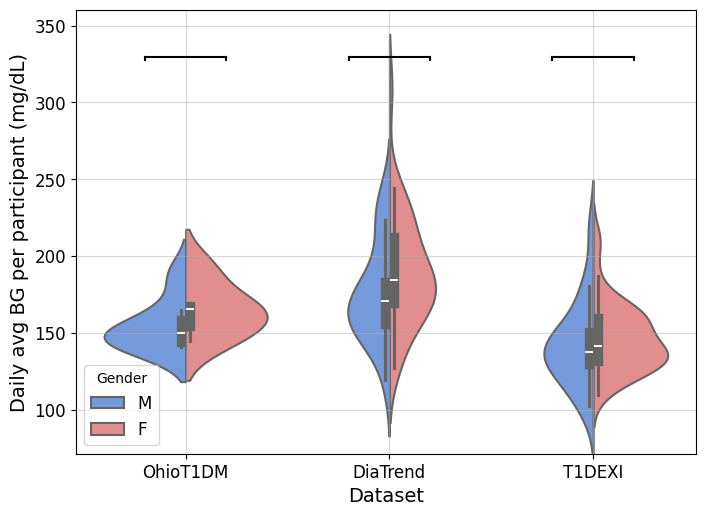

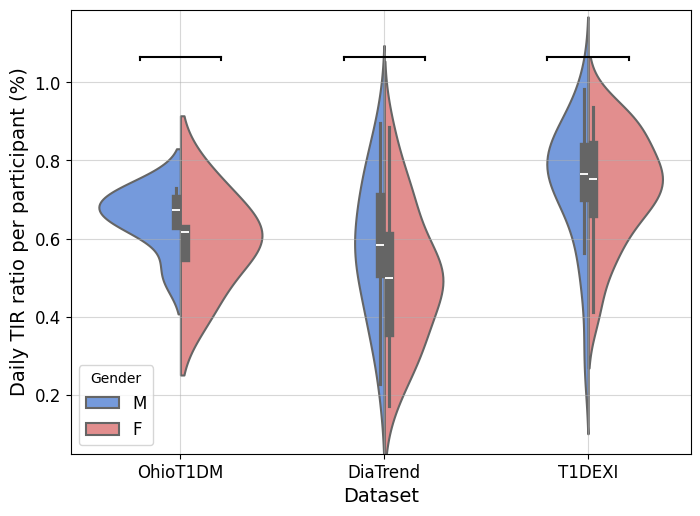

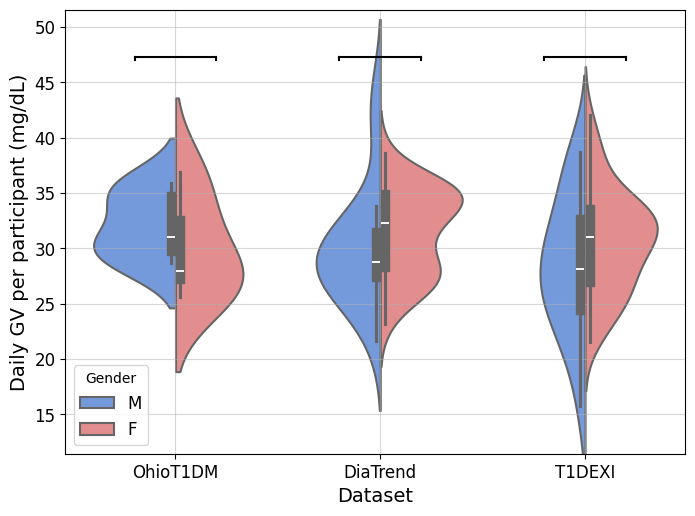

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Load the data
demographics = pd.read_csv('demographics.csv')

demographics.rename(columns={
    'AVE CGM (daily avg)': 'Daily avg BG per participant (mg/dL)',
    'TIR ratio': 'Daily TIR ratio per participant (%)',
    'Gly var (daily std)': 'Daily GV per participant (mg/dL)'
}, inplace=True)

# Separate the DataFrame into three sub-DataFrames by dataset type
ohio = demographics[demographics['Dataset'] == 'OhioT1DM']
diatrend = demographics[demographics['Dataset'] == 'DiaTrend']
t1dexi = demographics[demographics['Dataset'] == 'T1DEXI']

# Combine the three DataFrames into one for plotting
combined_df = pd.concat([
    ohio.assign(Dataset='OhioT1DM'),
    diatrend.assign(Dataset='DiaTrend'),
    t1dexi.assign(Dataset='T1DEXI')
])

# Perform Mann-Whitney U test between the two gender groups for each specified column and dataset
def perform_mann_whitney_u_test(data, column_name):
    female_data = data[data['Gender'] == 'F'][column_name]
    male_data = data[data['Gender'] == 'M'][column_name]
    
    if len(female_data) > 0 and len(male_data) > 0:
        u_stat, p_value = mannwhitneyu(female_data, male_data, alternative='two-sided')
        return u_stat, p_value
    else:
        return None, None

# Create a half-half violin plot for each specified column by gender and dataset
def create_grouped_violin_plot(column_name):
    plt.figure(figsize=(8, 6))
    
    # Create the split violin plot
    sns.violinplot(
        x='Dataset', 
        y=column_name, 
        hue='Gender', 
        data=combined_df, 
        split=True, 
        palette={'F': 'lightcoral', 'M': 'cornflowerblue'}, 
        linewidth=1.5
    )
    
    # Add labels
    plt.xlabel('Dataset', fontsize=14)
    plt.ylabel(column_name, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Gender', fontsize=12)
    plt.grid(alpha=0.5)
    
    # Get the y-axis limits for consistent annotation placement
    y_max = combined_df[column_name].max()
    y_min = combined_df[column_name].min()
    offset = (y_max - y_min) * 0.05
    
    # Adjust y-limits to create enough space for the annotations
    plt.ylim(y_min - offset*3, y_max + offset * 5)
    
    # Increase top margin to avoid cutoff issues
    plt.subplots_adjust(top=0.85)
    
    for i, dataset in enumerate(combined_df['Dataset'].unique()):
        data = combined_df[combined_df['Dataset'] == dataset]
        u_stat, p_value = perform_mann_whitney_u_test(data, column_name)
        
        # Get counts for M and F
        count_f = data[data['Gender'] == 'F'].shape[0]
        count_m = data[data['Gender'] == 'M'].shape[0]
        
        if p_value is not None:
            # Draw a horizontal bracket
            bracket_height = y_max + offset * 2
            bracket_bottom = bracket_height - offset * 0.2
            
            # Horizontal line
            plt.plot([i - 0.2, i + 0.2], [bracket_height, bracket_height], color='black', lw=1.5)
            # Left vertical line
            plt.plot([i - 0.2, i - 0.2], [bracket_bottom, bracket_height], color='black', lw=1.5)
            # Right vertical line
            plt.plot([i + 0.2, i + 0.2], [bracket_bottom, bracket_height], color='black', lw=1.5)

            # Annotate p-value and counts above the bracket
            # text = f'p={p_value:.3f}\nF={count_f}, M={count_m}'
            # plt.text(i, bracket_height + offset * 0.5, text, ha='center', fontsize=12, color='black')

    # Show the plot
    plt.show()

# Create grouped violin plots and perform Mann-Whitney U tests for the specified columns
columns = ['Daily avg BG per participant (mg/dL)', 'Daily TIR ratio per participant (%)', 'Daily GV per participant (mg/dL)']

for column in columns:
    create_grouped_violin_plot(column)


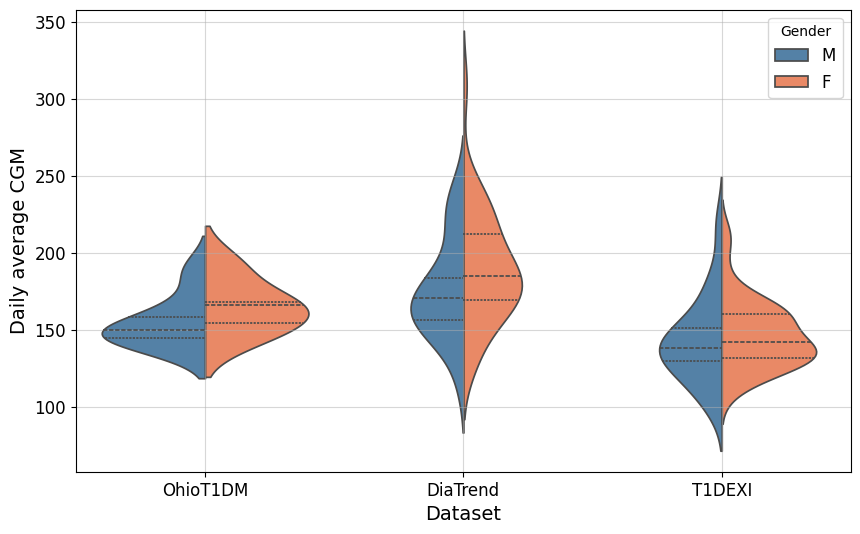

OhioT1DM - Daily average CGM: t-statistic = 1.005, p-value = 0.339
DiaTrend - Daily average CGM: t-statistic = 1.338, p-value = 0.187
T1DEXI - Daily average CGM: t-statistic = 0.536, p-value = 0.594


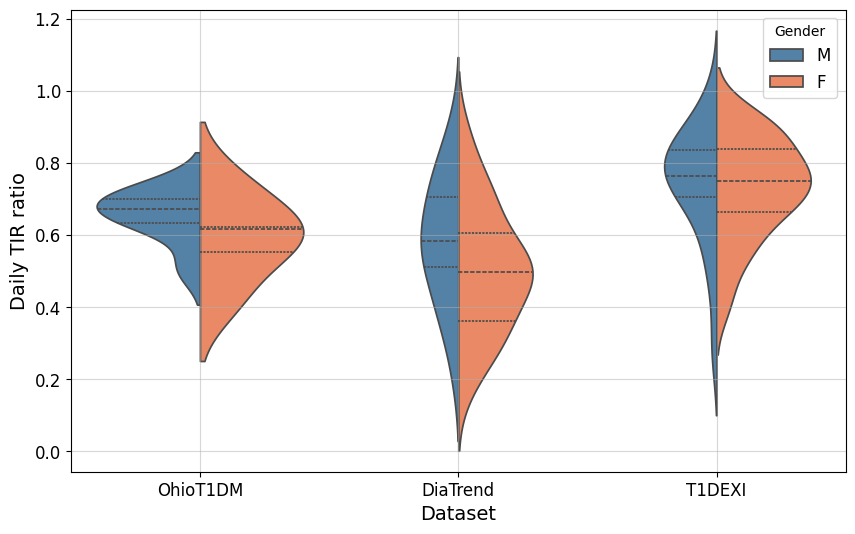

OhioT1DM - Daily TIR ratio: t-statistic = -1.142, p-value = 0.280
DiaTrend - Daily TIR ratio: t-statistic = -1.580, p-value = 0.120
T1DEXI - Daily TIR ratio: t-statistic = -0.180, p-value = 0.858


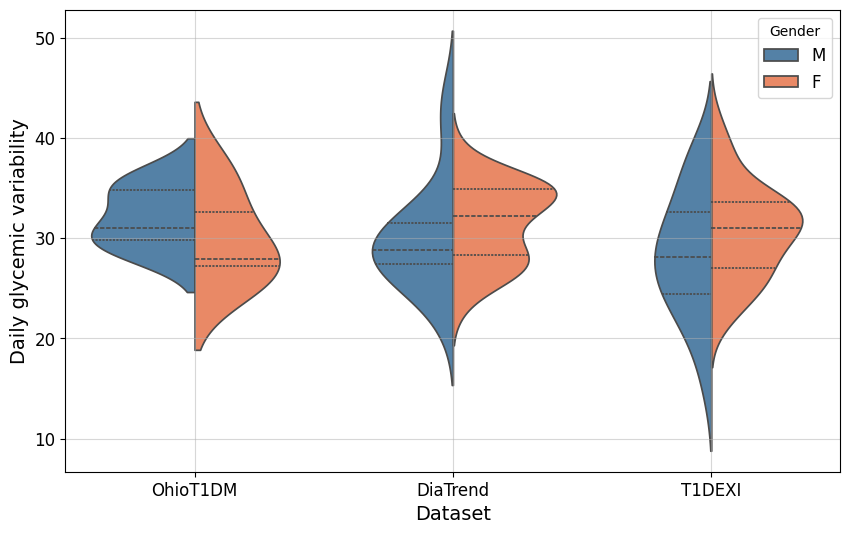

OhioT1DM - Daily glycemic variability: t-statistic = -0.939, p-value = 0.370
DiaTrend - Daily glycemic variability: t-statistic = 0.990, p-value = 0.327
T1DEXI - Daily glycemic variability: t-statistic = 1.577, p-value = 0.120


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the data
demographics = pd.read_csv('demographics.csv')

# Rename the specified columns
demographics.rename(columns={
    'AVE CGM (daily avg)': 'Daily average CGM',
    'TIR ratio': 'Daily TIR ratio',
    'Gly var (daily std)': 'Daily glycemic variability'
}, inplace=True)

# Separate the DataFrame into three sub-DataFrames by dataset type
ohio = demographics[demographics['Dataset'] == 'OhioT1DM']
diatrend = demographics[demographics['Dataset'] == 'DiaTrend']
t1dexi = demographics[demographics['Dataset'] == 'T1DEXI']

# Combine the three DataFrames into one for plotting
combined_df = pd.concat([
    ohio.assign(Dataset='OhioT1DM'),
    diatrend.assign(Dataset='DiaTrend'),
    t1dexi.assign(Dataset='T1DEXI')
])

# Create a half-half violin plot for each specified column by gender and dataset
def create_half_violin_plot(column_name):
    plt.figure(figsize=(10, 6))
    
    # Create the violin plot
    sns.violinplot(x='Dataset', y=column_name, hue='Gender', data=combined_df, split=True, palette={'F': 'coral', 'M': 'steelblue'}, inner='quartile')
    
    # Add labels
    plt.xlabel('Dataset', fontsize=14)
    plt.ylabel(column_name, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Gender', fontsize=12)
    plt.grid(alpha=0.5)
    
    # Show the plot
    plt.show()

# Perform t-test between the two gender groups for each specified column and dataset
def perform_t_test(data, column_name):
    female_data = data[data['Gender'] == 'F'][column_name]
    male_data = data[data['Gender'] == 'M'][column_name]
    t_stat, p_value = ttest_ind(female_data, male_data, nan_policy='omit')
    return t_stat, p_value

# Create half-half violin plots and perform t-tests for the specified columns
columns = ['Daily average CGM', 'Daily TIR ratio', 'Daily glycemic variability']
for column in columns:
    create_half_violin_plot(column)
    for dataset_name, data in {'OhioT1DM': ohio, 'DiaTrend': diatrend, 'T1DEXI': t1dexi}.items():
        t_stat, p_value = perform_t_test(data, column)
        print(f'{dataset_name} - {column}: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}')

In [44]:
# Rename the specified columns in demographics
demographics.rename(columns={
    'AVE CGM (daily avg)': 'Daily average CGM',
    'TIR ratio': 'Daily TIR ratio',
    'Gly var (daily std)': 'Daily glycemic variability',
    'Patient_id': 'SubjectID'
}, inplace=True)

# Merge the dataframes on "Dataset" and "SubjectID"
merged_df = pd.merge(result_table, demographics, on=['Dataset', 'SubjectID'])


In [50]:
merged_df

,Dataset,SubjectID,Martinsson_retrained,Martinsson_crosscheck,vanDoorn_retrained,vanDoorn_crosscheck,Deng_retrained,Deng_crosscheck,Lee_retrained,Lee_crosscheck,...,Gender,Age,Race,Daily average CGM,Daily glycemic variability,Daily TIR ratio,T1DEXI Exercise Group,Insulin Delivery Mode,"BMI (just for T1DEXI, normal or overweight)",HbA1C
0,OhioT1DM,540,21.352480,21.352480,21.641844,21.641844,22.35,22.35,22.78,22.78,...,M,20–40,NaN,141.0050,33.91281,0.690298,NaN,PUMP,NaN,NaN
1,OhioT1DM,544,17.058359,17.058359,17.046157,17.046157,17.15,17.15,18.18,18.18,...,M,40–60,NaN,164.8916,30.75381,0.640227,NaN,PUMP,NaN,NaN
2,OhioT1DM,552,16.038330,16.038330,16.355163,16.355163,16.60,16.60,16.67,16.67,...,M,20–40,NaN,145.2375,31.03995,0.729447,NaN,PUMP,NaN,NaN
3,OhioT1DM,559,18.618088,18.618088,19.028491,19.028491,19.06,19.06,19.87,19.87,...,F,20–40,NaN,167.8130,36.87849,0.553600,NaN,PUMP,NaN,NaN
4,OhioT1DM,563,17.997108,17.997108,18.097660,18.097660,18.38,18.38,18.32,18.32,...,M,40–60,NaN,149.8922,28.71523,0.711924,NaN,PUMP,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,T1DEXI,1683,19.714340,20.566400,19.917330,20.499680,20.03,20.40,21.16,21.27,...,F,20,WHITE,143.7827,30.56774,0.768782,NaN,MDI,27.87843,6.1
124,T1DEXI,1689,20.082270,19.722460,20.268260,19.791010,20.31,19.90,20.26,20.00,...,F,50,WHITE,172.7788,26.98128,0.586899,NaN,MDI,24.96103,7.1
125,T1DEXI,1695,18.867980,19.286660,18.830070,19.317940,19.06,19.31,19.37,19.82,...,F,25,WHITE,126.2572,25.27653,0.889945,NaN,CLOSED LOOP,23.29696,5.4
126,T1DEXI,1722,18.450220,19.413100,18.511040,18.931770,18.76,19.26,19.47,19.53,...,F,29,WHITE,160.0753,29.43964,0.674923,NaN,PUMP,23.40335,7.1


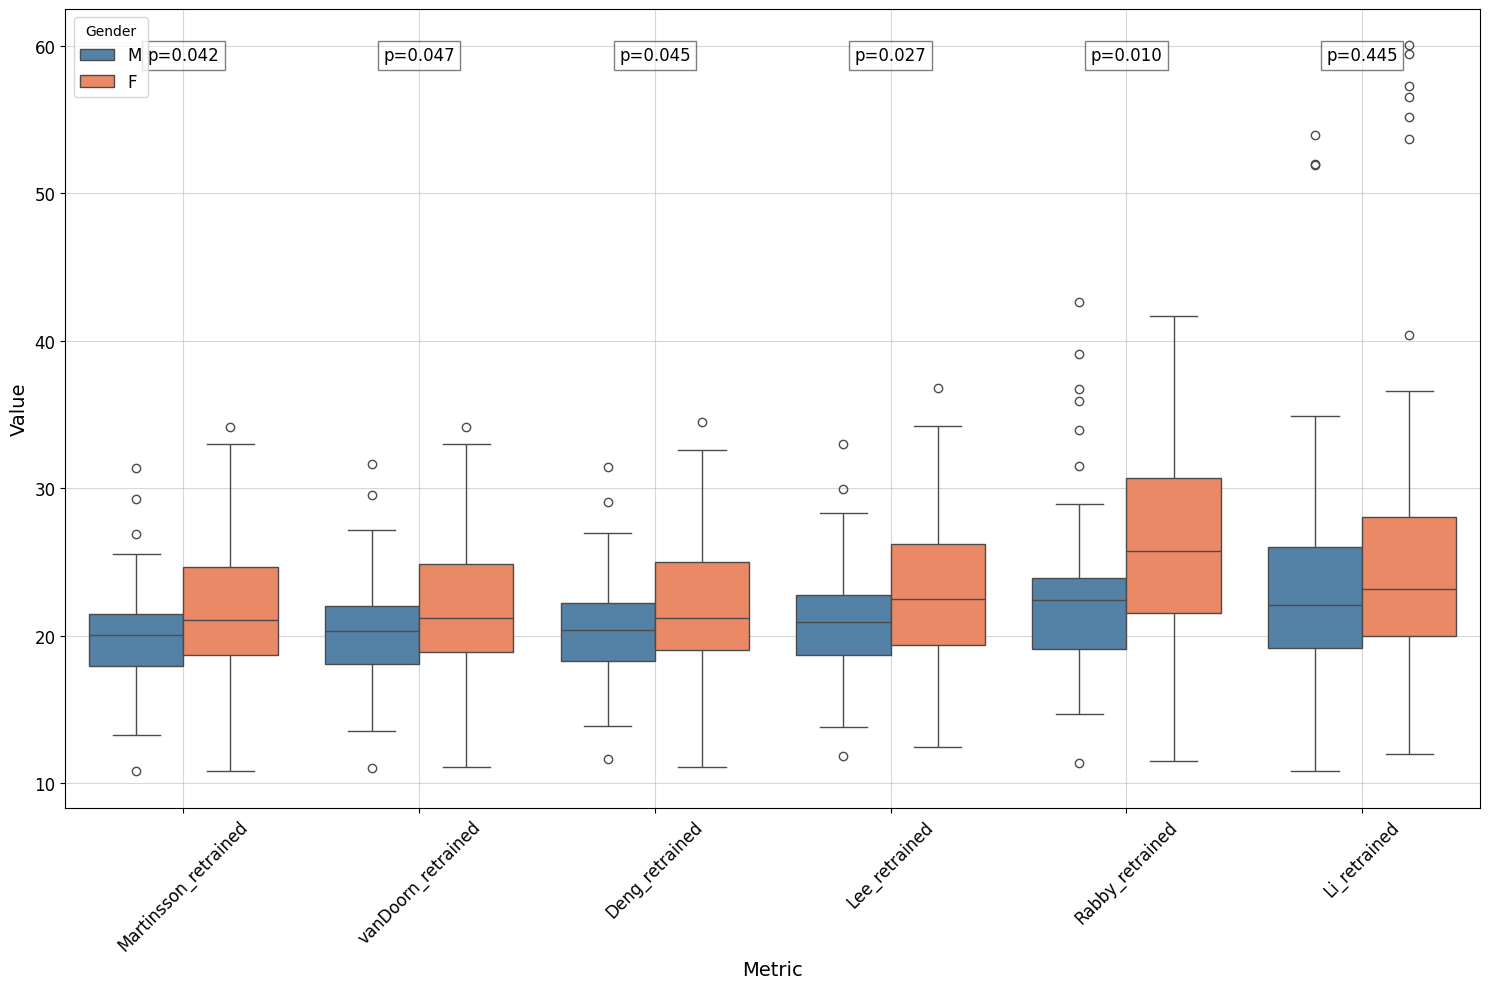

In [49]:
# Merge the dataframes on "Dataset" and "SubjectID"
merged_df = pd.merge(result_table, demographics, on=['Dataset', 'SubjectID'])

# Filter columns with "_retrained"
retrained_columns = [col for col in merged_df.columns if '_retrained' in col]

# Perform t-test between the two gender groups for each specified column
def perform_t_test(column_name):
    female_data = merged_df[merged_df['Gender'] == 'F'][column_name]
    male_data = merged_df[merged_df['Gender'] == 'M'][column_name]
    t_stat, p_value = ttest_ind(female_data, male_data)
    return t_stat, p_value

# Create a combined box plot for all "_retrained" columns by gender
plt.figure(figsize=(15, 10))

# Create a combined DataFrame for plotting
plot_data = pd.melt(merged_df, id_vars=['Gender'], value_vars=retrained_columns, var_name='Metric', value_name='Value')

# Create the box plot
sns.boxplot(x='Metric', y='Value', hue='Gender', data=plot_data, palette={'F': 'coral', 'M': 'steelblue'})

# Add labels
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.grid(alpha=0.5)

# Perform t-tests and annotate p-values
for i, column in enumerate(retrained_columns):
    t_stat, p_value = perform_t_test(column)
    plt.text(i, plt.ylim()[1] * 0.95, f'p={p_value:.3f}', ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.tight_layout()
plt.show()